# Exploring The World Happiness Report


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
def download_and_read_csv(dataset_link):
    """
    Downloads a dataset from Kaggle using the provided dataset link and creates a DataFrame from the downloaded CSV file.

    Args:
    - dataset_link (str): The Kaggle dataset link.

    Returns:
    - df (DataFrame): The DataFrame created from the downloaded CSV file.
    """
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset_link, path=".", unzip=True)
    files = os.listdir()

    for file in files:
        if file.endswith('.csv'):
            df = pd.read_csv(file)
            return df

In [3]:
df_2019 = pd.read_csv('2019.csv')
df = df_2019.copy()
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.77,1.34,1.59,0.99,0.60,0.15,0.39
1,2,Denmark,7.60,1.38,1.57,1.00,0.59,0.25,0.41
2,3,Norway,7.55,1.49,1.58,1.03,0.60,0.27,0.34
3,4,Iceland,7.49,1.38,1.62,1.03,0.59,0.35,0.12
4,5,Netherlands,7.49,1.40,1.52,1.00,0.56,0.32,0.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
df.isnull().sum() # no missings

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
df.duplicated().sum() # no duplicated rows

0

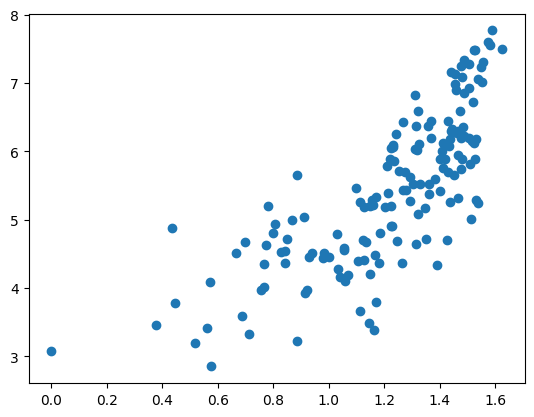

In [7]:
plt.scatter(df['Social support'], df['Score'])
plt.show()

In [8]:
df['Social support'].corr(df['Score']) # i see a correlation between 'Score' and 'Social support'

0.7770577880638639

In [9]:
df_CIS = df[df['Country or region'].isin(['Armenia', 'Azerbaijan', 'Belarus', 'Kazakhstan', 'Kirghizstan', 'Moldavia', 'Uzbekistan', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine'])]
print(df_CIS)


     Overall rank Country or region  Score  GDP per capita  Social support  \
40             41        Uzbekistan   6.17            0.74            1.53   
59             60        Kazakhstan   5.81            1.17            1.51   
67             68            Russia   5.65            1.18            1.45   
73             74        Tajikistan   5.47            0.49            1.10   
80             81           Belarus   5.32            1.07            1.47   
86             87      Turkmenistan   5.25            1.05            1.54   
89             90        Azerbaijan   5.21            1.04            1.15   
115           116           Armenia   4.56            0.85            1.05   
132           133           Ukraine   4.33            0.82            1.39   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
40                      0.76                          0.63        0.32   
59                      0.73                          0.41        0.15 

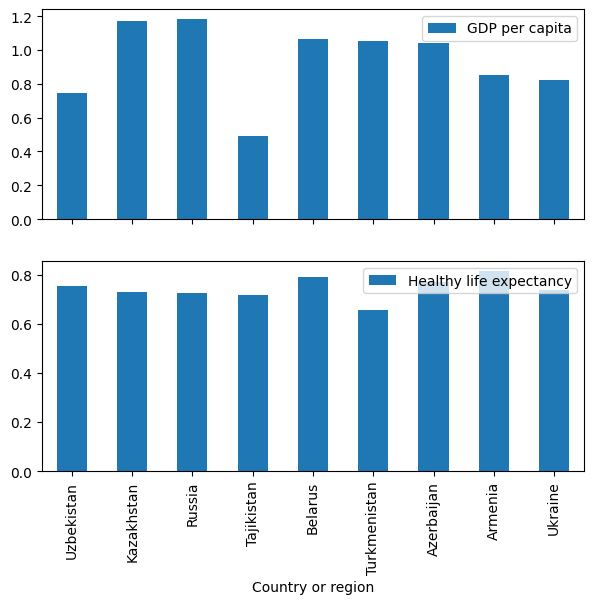

In [18]:
fig, axes = plt.subplots(2, 1, figsize = (7, 6), sharex=True)
df_CIS.plot(x = 'Country or region', y = 'GDP per capita', kind = 'bar', ax = axes[0])
df_CIS.plot(x = 'Country or region', y = 'Healthy life expectancy', kind = 'bar', ax = axes [1])
plt.show()

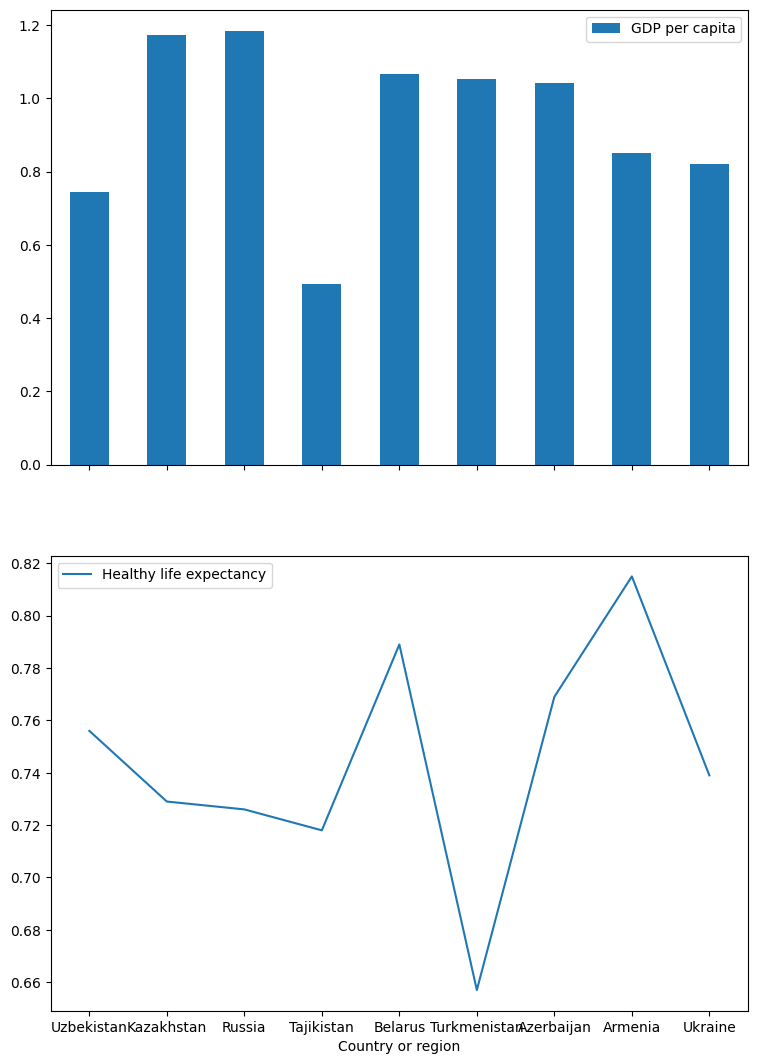

In [23]:
fig, axes = plt.subplots(2, 1, figsize = (9, 13), sharex=True)
df_CIS.plot(x = 'Country or region', y = 'GDP per capita', kind = 'bar', ax = axes[0])
df_CIS.plot(x = 'Country or region', y = 'Healthy life expectancy', kind = 'line', ax = axes [1])
plt.show()